In [ ]:
"""
This is an example of running single plot
"""
from visualization.utils import o3d_plot, o3d_pcl, o3d_mesh
import numpy as np

master_pcl = np.load("/media/nesc525/perple/kinect_calib/master/pcls/id=0_st=1.0_dt=1.275266.npy").reshape(-1,3)/1000
sub1_pcl = np.load("/media/nesc525/perple/kinect_calib/sub1/pcls/id=0_st=1.0_dt=1.266688.npy").reshape(-1,3)/1000
sub2_pcl = np.load("/media/nesc525/perple/kinect_calib/sub2/pcls/id=0_st=1.0_dt=1.240666.npy").reshape(-1,3)/1000
trans_arr_master = np.load("/media/nesc525/perple/kinect_calib/trans_master.npy")
trans_arr_sub1 = np.load("/media/nesc525/perple/kinect_calib/trans_sub1.npy")
trans_arr_sub2 = np.load("/media/nesc525/perple/kinect_calib/trans_sub2.npy")
trans_pcl_mas = (trans_arr_master[:3,-1].T + master_pcl) @ trans_arr_master[:3, :3]
trans_pcl_sub1 = (trans_arr_sub1[:3,-1].T + sub1_pcl) @ trans_arr_sub1[:3, :3]
trans_pcl_sub2 = (trans_arr_sub2[:3,-1].T + sub2_pcl) @ trans_arr_sub2[:3, :3]

o3d_plot([o3d_pcl(master_pcl, color=[0,0,1]), o3d_pcl(sub1_pcl, color=[0,1,0]), o3d_pcl(sub2_pcl, color=[1,0,0])], 'OptiTrack Output')

In [ ]:
%load_ext autoreload
%autoreload 2

from visualization.o3d_plot import KinectRealtimeStreamPlot

plot = KinectRealtimeStreamPlot('./__test__/default', ['sub1', 'sub2'])
plot.show()

In [ ]:
"""
Visualize optitrack skeleton and arbe pcl
"""
from visualization.o3d_plot import OptitrackArbeStreamPlot
from multiprocessing import Pool

def process(path, angle_of_view=[0,-1,0,1]):
    plot = OptitrackArbeStreamPlot(path, angle_of_view)
    plot.show()

# root_path = "/media/nesc525/backup/max21-09-09_17-03-33"
root_path = "/media/nesc525/data/2021-09-18_21-38-15"
pool = Pool()
pool.apply_async(process, (root_path, [0,-1,0,1]))
# pool.apply_async(process, (root_path, [1,1,0,2]))
# pool.apply_async(process, (root_path, [-1,1,0,2]))
pool.close()
pool.join()

In [ ]:
"""
Visualize kinect skeleton and arbe pcl
"""
from multiprocessing import Pool
from visualization.o3d_plot import KinectArbeStreamPlot
root_path = "/media/nesc525/perple/2021-09-10_11-27-22"
# root_path = "/home/nesc525/chen/3DSVC/__test__/default"

def process(path, device, angle_of_view, fps=30):
    plot = KinectArbeStreamPlot(path, device, angle_of_view)
    plot.show(fps=fps)

pool = Pool()
pool.apply_async(process, (root_path, ['master'], [0,-1,0,1]))
# pool.apply_async(process, (root_path, ['sub1'], [1,1,0,2]))
# pool.apply_async(process, (root_path, ['sub2'], [-1,1,0,2]))
pool.close()
pool.join()

In [ ]:
from visualization.o3d_plot import KinectOfflineStreamPlotCpp

root_path = "/home/nesc525/drivers/2/2021-10-20_20-06-52_T"
# root_path = "/home/nesc525/chen/3DSVC/__test__/default"
plot = KinectOfflineStreamPlotCpp(root_path, devices=["master"], start_frame=50, write_ply=False)
plot.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_rmse(arr, color, label):
    hist, bin_edges = np.histogram(arr, bins=10, range=[0,0.2])
    cdf = np.cumsum(hist)/arr.size
    model=make_interp_spline(bin_edges[:-1], cdf, bc_type="natural")
    xs=np.linspace(0, 0.2, 100)
    ys=model(xs)
    plt.plot(xs, ys, color=color, label=label)

p4t_rmse_rs_01 = np.load("ignoredata/p4t/r_s=0.1/rmse.npy")[:,2]
p4t_rmse_rs_05 = np.load("ignoredata/p4t/r_s=0.5/rmse.npy")[:,2]
p4t_rmse_rs_07 = np.load("ignoredata/p4t/r_s=0.7/rmse.npy")[:,2]
p4t_rmse_rs_09 = np.load("ignoredata/p4t/r_s=0.9/rmse.npy")[:,2]
p4t_rmse_rs_13 = np.load("ignoredata/p4t/r_s=1.3/rmse.npy")[:,2]
p4t_rmse_cl_01 = np.load("ignoredata/p4t/c_l=1/rmse.npy")[:,2]
p4t_rmse_rt_00 = np.load("ignoredata/p4t/r_t=0/rmse.npy")[:,2]
p4t_rmse_rt_02 = np.load("ignoredata/p4t/r_t=2/rmse.npy")[:,2]
paconv_rmse_wF3 = np.load("ignoredata/paconv/test_result/test_RMSE-wF3.npy")
paconv_rmse_wF6 = np.load("ignoredata/paconv/test_result/test_RMSE-wF6.npy")
paconv_rmse_woF = np.load("ignoredata/paconv/test_result/test_RMSE-woF.npy")
plstm_rmse = np.load("/home/nesc525/chen/3DSVC/ignoredata/plstm/loss_plstm.npy")

plot_rmse(p4t_rmse_rs_01, 'red', 'r_s=0.1')
plot_rmse(p4t_rmse_rs_05, 'orange', 'r_s=0.5')
plot_rmse(p4t_rmse_rs_07, 'yellow', 'r_s=0.7')
plot_rmse(p4t_rmse_rs_09, 'green', 'r_s=0.9')
plot_rmse(p4t_rmse_rs_13, 'indigo', 'r_s=1.3')
plot_rmse(p4t_rmse_cl_01, 'blue', 'c_l=1')
plot_rmse(p4t_rmse_rt_00, 'violet', 'r_t=0')
plot_rmse(p4t_rmse_rt_02, 'pink', 'r_t=2')
plot_rmse(paconv_rmse_wF3, 'cyan', 'f=3')
plot_rmse(paconv_rmse_wF6, 'black', 'f=6')
plot_rmse(paconv_rmse_woF, 'grey', 'f=0')
plot_rmse(plstm_rmse, 'gold', 'plstm')

plt.xlabel("error (m)")
plt.ylabel("percentage")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_rmse(arr, color, label):
    hist, bin_edges = np.histogram(arr, bins=10)
    cdf = np.cumsum(hist)/arr.size*100
    plt.plot(bin_edges[:-1], cdf, color=color, label=label)

without_gmm = np.load("ignoredata/p4tmesh/new/111110/rmse.npy")
with_gmm = np.load("ignoredata/p4tmesh/new/1111100001/rmse.npy")

plot_rmse(without_gmm, 'red', 'without_gmm')
plot_rmse(with_gmm, 'orange', 'with_gmm')

plt.xlabel("smpl param rmse")
plt.ylabel("percentage")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import os
from matplotlib import rcParams

config = {
    "font.family":'Times New Roman',
    "font.size": 20,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)

def plot_cdf(arr, color, label):
    hist, bin_edges = np.histogram(arr, bins=100, range=[0,0.2])
    cdf = np.cumsum(hist)/arr.size
    plt.plot(bin_edges[:-1], cdf, color=color, label=label)

    # model=make_interp_spline(bin_edges[:-1], cdf, bc_type="natural")
    # xs=np.linspace(0, 0.2, 100)
    # ys=model(xs)
    # plt.plot(xs, ys, color=color, label=label)

path = ""
device = "mmWave"
joint_loss_in_lab = np.load(os.path.join(path, "indoor_test/joints_loss.npy"))
joint_loss_corridor = np.load(os.path.join(path, "corridor_test/joints_loss.npy"))
joint_loss_night = np.load(os.path.join(path, "night_test/joints_loss.npy"))
joint_loss_outdoor = np.load(os.path.join(path, "outdoor_test/joints_loss.npy"))
joint_loss_rain = np.load(os.path.join(path, "rain_test/joints_loss.npy"))
joint_loss_smoke = np.load(os.path.join(path, "smoke_test/joints_loss.npy"))
joint_loss_occlusion = np.load(os.path.join(path, "mask_test/joints_loss.npy"))

# vertices_loss_in_lab = np.load(os.path.join(path, "vertices_loss.npy"))
# rgbd_vertices_loss_in_lab = np.load(os.path.join(path2, "vertices_loss.npy"))
plt.figure(figsize=(15,8), dpi=80)

plot_cdf(joint_loss_in_lab, 'red', '{}_joint_error_in_lab'.format(device))
plot_cdf(joint_loss_corridor, 'orange', '{}_joint_error_corridor'.format(device))
plot_cdf(joint_loss_night, 'yellow', '{}_joint_error_night'.format(device))
plot_cdf(joint_loss_outdoor, 'green', '{}_joint_error_outdoor'.format(device))
plot_cdf(joint_loss_rain, 'indigo', '{}_joint_error_rain'.format(device))
plot_cdf(joint_loss_smoke, 'blue', '{}_joint_error_smoke'.format(device))
plot_cdf(joint_loss_occlusion, 'violet', '{}_joint_error_occlusion'.format(device))
# plot_rmse(p4t_rmse_rt_02, 'pink', 'r_t=2')
# plot_rmse(paconv_rmse_wF3, 'cyan', 'f=3')
# plot_rmse(paconv_rmse_wF6, 'black', 'f=6')
# plot_rmse(paconv_rmse_woF, 'grey', 'f=0')
# plot_rmse(plstm_rmse, 'gold', 'plstm')

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

plt.xlim((0,0.2))
plt.ylim((0,1))
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
# plt.xticks(np.arange(0,200,10))
plt.grid()
plt.xlabel("error (m)",fontsize=16)
plt.ylabel("percentage",fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(loc="lower right")
# plt.savefig(fname=os.path.join(path,device), dpi=80)
plt.show()

# CDF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import os
from matplotlib import rcParams

config = {
    "font.family":'Times New Roman',
    "font.size": 40,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)
max = 24
def plot_cdf(arr, color, label, linestyle='-'):
    hist, bin_edges = np.histogram(arr*100, bins=100, range=[0,max])
    cdf = np.cumsum(hist)/arr.size
    plt.plot(bin_edges[:-1], cdf, color=color, linewidth=4, label=label,  linestyle=linestyle)
    # plt.plot(bin_edges[:-1], cdf, linewidth=3.0, label=label, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(20,10), facecolor='white')

path_mm = "/home/nesc525/drivers/4/p4tmesh/new_test/loss"
# path_mm_NF = "/home/nesc525/drivers/4/p4tmesh/large4/nofeature/loss"
# path_depth_mas = "/home/nesc525/drivers/4/20211113-Test/depth/master/loss"
path_depth_sub = "/home/nesc525/drivers/4/p4tdepth/depth/loss"
# path_rgbd_mas = "/home/nesc525/drivers/4/20211113-Test/RGBD/master/loss"
path_rgbd_sub = "/home/nesc525/drivers/4/p4tdepth/RGBD/loss"
labels = ['mmWave', 'Depth', 'RGBD', 'depth_mas', 'rgbd_mas']
colors = ['#45D1B9', '#DEA6FF', '#FFB44A', 'red', 'violet']
for i, model in enumerate([path_mm, path_depth_sub, path_rgbd_sub]):
# for i, model in enumerate([path_mm, path_mm_NF, path_depth_sub, path_rgbd_sub, path_depth_mas, path_rgbd_mas]):
    loss = []
    print(model)
    # for p in ['indoor_test','corridor_test']:
    for p in ['outdoor_test','night_test','rain_test','smoke_test']:
        l = np.mean(np.load(os.path.join(model, p, "per_joint_err.npy")), axis=1)
        loss += list(l)
    indoor_loss = np.asarray(loss)
    plot_cdf(indoor_loss, colors[i], labels[i])

    # for p in ['outdoor_test','night_test','rain_test','smoke_test']:
    #     l = np.load(os.path.join(model, p, "joints_loss.npy"))
    #     loss += list(l)
    # outdoor_loss = np.asarray(loss)
    # plot_cdf(outdoor_loss, colors[i], labels[i]+'-out', '--')


def to_percent(temp, _):
    return '%1.0f'%(100*temp) + '%'

plt.xlim((0,max))
plt.ylim((0,1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks(np.arange(0,max+1,2))
plt.grid()
plt.xlabel("error threshold ϵ (cm)")
plt.ylabel("proportion of frames with error <ϵ")
# plt.tick_params(labelsize=30)
plt.legend(loc="lower right", fontsize=35)
plt.savefig(fname="outdoor_cdf.pdf", format='pdf', dpi=80)
plt.show()

# Per Joint Loss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib import rcParams

config = {
    "font.family":'Times New Roman',
    "font.size": 40,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.grid(zorder=0)

j_err = np.load("/home/nesc525/drivers/4/p4tmesh/new_test/loss/indoor_test/per_joint_loss.npy")[:24]*100
# j_err = np.load("/home/nesc525/drivers/4/20211113-Test/RGBD/sub1/loss/indoor_test/per_joint_loss.npy")[:24]*100
xs=np.linspace(0,24,25)
plt.bar(x=xs, height=np.hstack((j_err,np.mean(j_err))),width=0.6,align="center",zorder=3,color='#31acb5')
plt.xticks(ticks=xs, labels=('Pelvis','L_Hip','R_Hip','Spine1','L_Knee','R_Knee','Spine2','L_Ankle','R_Ankle','Spine3','L_Foot','R_Foot','Neck','L_Collar'
                                ,'R_Collar','Head','L_Shoulder','R_Shoulder','L_Elbow','R_Elbow','L_Wrist','R_Wrist','L_Hand','R_Hand','Average'), rotation=30, horizontalalignment='right', fontsize=25)
# for i, v in enumerate(j_err):
#     plt.text(i, v+0.003, round(v,3), horizontalalignment='center', fontsize=30)
plt.yticks(np.arange(0,15,2))
plt.xlim(-0.5,24.5)
plt.ylabel("joint position error (cm)", fontsize=40)
plt.savefig(fname="PJPE.pdf", format='pdf', dpi=80)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib import rcParams
import pandas

config = {
    "font.family":'Times New Roman',
    "font.size": 40,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')

mean_err = np.asarray([[9.4, 11.6, 8.3, 11.0, 13.0, 13.0],
                    # [0.061, 0.059, 0.062, 0.074, 0.086, 0.086],
                    [10.1, 12.0, 8.1, 9.1, 14.4, 15.0],
                    [9.7, 10.0, 7.7, 9.4, 13.0, 16.4],])
                    # [0.064, 0.049, 0.073, 0.06, 0.07, 0.047],
                    # [0.066, 0.048, 0.058, 0.059, 0.069, 0.045]])

var = np.asarray([[0.16218641540035605,0.24298394564539194, 0.1755455625243485, 0.2151191234588623, 0.3550641005858779, 0.3255056915804744],
                    # [0.001, 0.0012, 0.001, 0.0011, 0.0018, 0.0015],
                    [0.1936259912326932, 0.1869063707999885, 0.13970258878543973, 0.17190631479024887, 0.3598258597776294, 0.7427098229527473],
                    [0.205033621750772, 0.17278001178056002, 0.1843291101977229, 0.21135860588401556, 0.4093645606189966, 1.305082906037569]])
                    # [0.001, 0.0004, 0.0011, 0.0008, 0.0013, 0.001],
                    # [0.001, 0.0003, 0.0008, 0.0009, 0.0013, 0.0009]])s

x_labels = ('In-lab','In-corridor','Out-daytime','Out-night','Out-rain','Out-smoke')
y_labels = ('mmWave','Depth','RGBD')
colors = ['#31acb5', '#6A45A8', '#FFA145', 'red', 'violet']
# colors = ['#45D1B9', '#9FA6FF', '#FFB44A', 'red', 'violet']
# y_labels = ('mm_F','mm_NF','depth_sub','rgbd_sub','depth_mas','rgbd_mas')
x = np.arange(len(x_labels))
width = 0.3
error_params=dict(elinewidth=3, capsize=4)
for i, err in enumerate(mean_err):
    ax.bar(x-(1-i)*width, err, width, yerr=var[i], error_kw=error_params, label=y_labels[i], zorder=3, color=colors[i])
    
plt.xticks(ticks=x, labels=x_labels, horizontalalignment='center', fontsize=25)
plt.yticks(np.arange(0,20,2))
plt.ylabel("Mean Per Vertex Error (cm)", fontsize=40)
plt.grid(zorder=0)
ax.legend(fontsize=30)
plt.savefig(fname="MPVE.pdf", format='pdf', dpi=80)
plt.show()

# TSNE

In [1]:
from __future__ import print_function
import time
import os
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from dataloader.result_loader import MinimalLoader
from dataloader.utils import file_paths_from_dir

## Prepare Data

### Mean Shape

In [ ]:
root_path = "/home/nesc525/drivers/2/mean_shape"

dirs = os.listdir(root_path)

for d in dirs:
    if d[0] == '.' or os.path.isfile(os.path.join(root_path, d)):
        continue
    print(d)
    _shape = []
    files = file_paths_from_dir(os.path.join(root_path, d), '.npz')
    print(files)
    for f in files:
        try:
            param = np.load(f)
        except:
            continue
        _shape.append(param["shape"])
        # print(_shape)
    _shape = np.vstack(_shape).mean(axis=0)
    print(_shape)
    np.save(os.path.join(root_path, d, "mean_shape"), _shape)

## Collect Data

### From Dataset

In [12]:
from dataloader.utils import file_paths_from_dir
import random

root_path_list = [
    # "/home/nesc525/drivers/5/AMASS/CMU",
    # "/home/nesc525/drivers/5/AMASS/ACCAD",
    "/home/nesc525/drivers/5/AMASS/DanceDB",
    # "/home/nesc525/drivers/5/AMASS/MPI_Limits"
]

files = []

for root_path in root_path_list:
    _f = file_paths_from_dir(root_path, '.npz')
    files.extend(_f)

amass_pose = []
amass_shape = []

if len(files) > 1000:
    files = random.sample(files, 1000)

print(len(files))

for f in files:
    print(f)
    param = np.load(f)
    # try:
    if "poses" in param:
        amass_pose.append(param["poses"][:,:21*3])
        amass_pose_df = pd.DataFrame(np.vstack(amass_pose))

    if "betas" in param:
        amass_shape.append(param["betas"][:10])
        amass_shape_df = pd.DataFrame(amass_shape)

amass_pose_df.columns = amass_pose_df.columns.astype(str)
amass_shape_df.columns = amass_shape_df.columns.astype(str)
amass_pose_df[['0', '1', '2']] = 0

amass_pose_df["y"] = 0
amass_shape_df["y"] = 0

Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20120807_VasoAristeidou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20180501_CliodelaVara
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20141230_MaritsaElia
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20140805_NikosMichael
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20151003_AndriaMichaelidou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20150927_VasoAristeidou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20120805_VasoAristeidou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20151003_ElenaKyriakou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20140526_StephanosKoullapis
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20130216_AnnaCharalambous
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20131001_SophieKamenou
Loading .npz from /home/nesc525/drivers/5/AMASS/DanceDB/20131001

ValueError: need at least one array to concatenate

In [11]:
dict(np.load(files[100]))

{'trans': array([[0.09091846, 0.2891424 , 0.88195788],
        [0.09077652, 0.28920827, 0.8819728 ],
        [0.09074516, 0.28921095, 0.88198553],
        ...,
        [0.12761182, 1.00124623, 0.89111869],
        [0.12463779, 1.00126507, 0.89072334],
        [0.1217227 , 1.00115614, 0.89034187]]),
 'gender': array('female', dtype='<U6'),
 'mocap_framerate': array(120.),
 'betas': array([ 1.08912625,  0.99210911,  1.09697302, -4.60588065, -0.54930188,
        -1.67109243,  1.43735149,  0.63444643,  2.13049511,  1.99754807,
         2.70359239, -2.33786445,  2.30803729, -1.70845167,  2.16196314,
         1.14823803]),
 'dmpls': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'poses': array([[ 1.40743784,  0.3999133 ,  0.33870958, ...,  0.53555915,
         -0.04596104,  0.27735802],
      

### Pose Data

In [19]:
root_path_list = [
    "/home/nesc525/drivers/1",
    "/home/nesc525/drivers/2"
]

pose_df = pd.DataFrame()
shape_df = pd.DataFrame()

color_count = 0

sample_rate = 5

ignore_jnts = [0, 1, 2, 3, 4, 5, 33, 34, 35, 36, 37, 38, 69, 70, 71, 72, 73, 74]

for root_path in root_path_list:
    dirs = os.listdir(root_path)

    for i in range(len(dirs)):
        pose = []
        shape = []

        loader = MinimalLoader(os.path.join(root_path, dirs[i]))

        if len(loader) == 0:
            continue

        color_count += 1

        for j in range(len(loader)):
            if j % sample_rate != 0:
                continue
            try:
                pose_param = np.load(loader[j]["minimal/param"]["filepath"])["pose"]
            except:
                continue
            # pose_param[ignore_jnts] = 0
            pose.append(pose_param[3:3+21*3])
            # shape.append(param["shape"])
        # curr_shape_df = pd.DataFrame(shape)
        # curr_shape_df["y"] = i

        curr_pose_df = pd.DataFrame(pose)
        curr_pose_df["y"] = 1

        # shape_df = pd.concat([curr_shape_df, shape_df])
        pose_df = pd.concat([curr_pose_df, pose_df])

Loading .obj from /home/nesc525/drivers/1/2021-10-18_18-21-24_E/minimal/obj
Loading .npz from /home/nesc525/drivers/1/2021-10-18_18-21-24_E/minimal/param
Loading .obj from /home/nesc525/drivers/1/2021-10-23_21-13-05_E/minimal/obj
Loading .npz from /home/nesc525/drivers/1/2021-10-23_21-13-05_E/minimal/param
Loading .obj from /home/nesc525/drivers/1/2021-10-19_14-41-26_T/minimal/obj
Loading .npz from /home/nesc525/drivers/1/2021-10-19_14-41-26_T/minimal/param
Loading .obj from /home/nesc525/drivers/1/.Trash-1000/minimal/obj
Loading .npz from /home/nesc525/drivers/1/.Trash-1000/minimal/param
Loading .obj from /home/nesc525/drivers/1/2021-10-18_10-03-20_E/minimal/obj
Loading .npz from /home/nesc525/drivers/1/2021-10-18_10-03-20_E/minimal/param
Loading .obj from /home/nesc525/drivers/1/2021-10-23_20-33-50_T/minimal/obj
Loading .npz from /home/nesc525/drivers/1/2021-10-23_20-33-50_T/minimal/param
Loading .obj from /home/nesc525/drivers/1/2021-10-18_10-06-35_E/minimal/obj
Loading .npz from /h

In [29]:
amass_pose_df[[0,1,2]] = 0
pose_df[[0,1,2]] = 0

amass_pose_df.to_csv("./ignoredata/visualize_files/cmu_pose.csv")
amass_shape_df.to_csv("./ignoredata/visualize_files/cmu_shape.csv")
pose_df.to_csv("./ignoredata/visualize_files/mm_pose.csv")
shape_df.to_csv("./ignoredata/visualize_files/mm_shape.csv")

### Shape Data

In [27]:
root_path = "/home/nesc525/drivers/2/mean_shape"

dirs = os.listdir(root_path)

shape_df = pd.DataFrame()

for d in dirs:
    if d[0] == '.' or os.path.isfile(os.path.join(root_path, d)):
        continue

    shape = np.load(os.path.join(root_path, d, "mean_shape.npy"))
    curr_shape_df = pd.DataFrame([shape])
    # curr_shape_df["y"] = int(d)
    curr_shape_df["y"] = 1
    shape_df = pd.concat([curr_shape_df, shape_df])

In [81]:
amass_pose_df = pd.read_csv("./ignoredata/visualize_files/cmu_pose.csv", index_col=0)
amass_shape_df = pd.read_csv("./ignoredata/visualize_files/cmu_shape.csv", index_col=0)
pose_df = pd.read_csv("./ignoredata/visualize_files/mm_pose.csv", index_col=0)
shape_df = pd.read_csv("./ignoredata/visualize_files/mm_shape.csv", index_col=0)

/home/nesc525/anaconda3/envs/3DSVC/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [82]:
amass_pose_df.index = [0] * len(amass_pose_df.index)
amass_shape_df.index = [0] * len(amass_shape_df.index)
pose_df.index = [0] * len(pose_df.index)
shape_df.index = [0] * len(shape_df.index)

In [3]:
def tsne(df):
    df_subset = df.drop(['y'], axis=1)
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df_subset)
    df_subset['tsne-one'] = tsne_results[:,0]
    df_subset['tsne-two'] = tsne_results[:,1]
    df_subset['y'] = df['y']
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return df_subset

def tsne3d(df):
    df_subset = df.drop(['y'], axis=1)
    time_start = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df_subset)
    df_subset['tsne-one'] = tsne_results[:,0]
    df_subset['tsne-two'] = tsne_results[:,1]
    df_subset['tsne-three'] = tsne_results[:,2]
    df_subset['y'] = df['y']
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return df_subset

In [83]:
pose_tsne = None
shape_tsne = None

## Plot
### One Fig

In [ ]:
if pose_tsne is None:
    pose_tsne = tsne(pose_df)

if shape_tsne is None:
    shape_tsne = tsne(shape_df)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(1, 2, 1)
# ax1.set_title("Pose TSNE")
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(pose_df["y"]))),
    data=pose_tsne,
    legend=False,
    alpha=0.3,
    ax=ax1
)

plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴

ax2 = plt.subplot(1, 2, 2)
# ax2.set_title("Shape TSNE")
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(shape_df["y"]))),
    data=shape_tsne,
    legend=False,
    alpha=0.3,
    size="y",
    sizes=(100, 100),
    ax=ax2
)

plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴

plt.savefig(fname="ignoredata/visualize_files/pose_shape_tsne.pdf",format="pdf")

### Seperated Figs

In [39]:
pose_tsne = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 31571 samples in 0.001s...
[t-SNE] Computed neighbors for 31571 samples in 18.757s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31571
[t-SNE] Computed conditional probabilities for sample 2000 / 31571
[t-SNE] Computed conditional probabilities for sample 3000 / 31571
[t-SNE] Computed conditional probabilities for sample 4000 / 31571
[t-SNE] Computed conditional probabilities for sample 5000 / 31571
[t-SNE] Computed conditional probabilities for sample 6000 / 31571
[t-SNE] Computed conditional probabilities for sample 7000 / 31571
[t-SNE] Computed conditional probabilities for sample 8000 / 31571
[t-SNE] Computed conditional probabilities for sample 9000 / 31571
[t-SNE] Computed conditional probabilities for sample 10000 / 31571
[t-SNE] Computed conditional probabilities for sample 11000 / 31571
[t-SNE] Computed conditional probabilities for sample 12000 / 31571
[t-SNE] Computed conditional probabilities for s

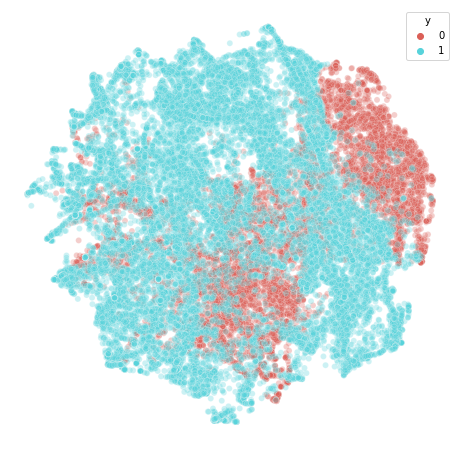

In [84]:
if pose_tsne is None:
    pose_tsne = tsne(pd.concat([amass_pose_df.sample(n=10000), pose_df]))
    # pose_tsne = tsne(amass_pose_df.copy())
    # pose_tsne[[27, 28, 29, 30, 31, 32, 63, 64, 65, 66, 67, 68]] = 0

plt.figure(figsize=(8,8))
ax1 = plt.subplot(1, 1, 1)
# ax1.set_title("Pose TSNE")
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(pose_tsne["y"]))),
    data=pose_tsne,
    legend=True,
    alpha=0.3,
    ax=ax1
)

plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴

plt.savefig(fname="ignoredata/visualize_files/cmu_pose_tsne.pdf",format="pdf")

(-9.26951961517334, 9.363912391662598, -8.27388129234314, 8.96070704460144)

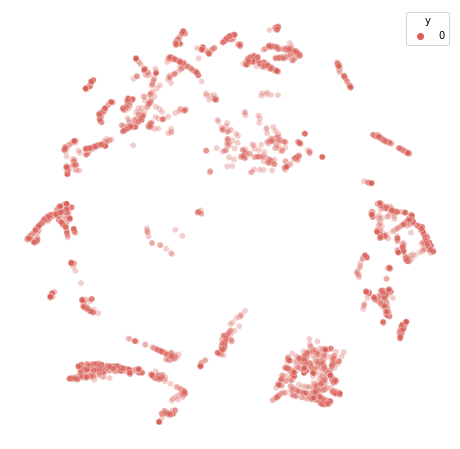

In [50]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(1, 1, 1)
# ax1.set_title("Pose TSNE")
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 1),
    data=pose_tsne[pose_tsne["y"]==0],
    legend=True,
    alpha=0.3,
    ax=ax1
)

plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴

In [69]:
shape_tsne = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1017 samples in 0.002s...
[t-SNE] Computed neighbors for 1017 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1017
[t-SNE] Computed conditional probabilities for sample 1017 / 1017
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.986191
[t-SNE] KL divergence after 300 iterations: 0.314024
t-SNE done! Time elapsed: 0.7704489231109619 seconds


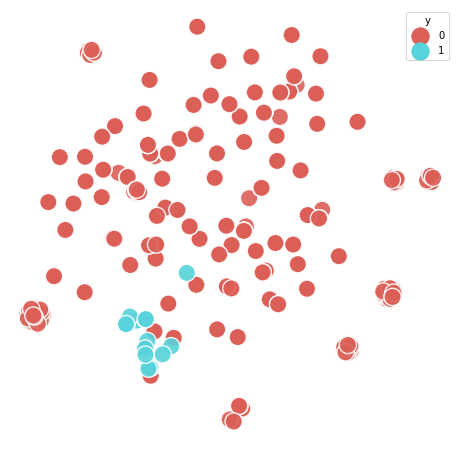

In [85]:
if shape_tsne is None:
    shape_tsne = tsne(pd.concat([amass_shape_df, shape_df]))
    # shape_tsne = shape_df

plt.figure(figsize=(8,8))
ax2 = plt.subplot(1, 1, 1)
# ax2.set_title("Shape TSNE")
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(shape_tsne["y"]))),
    data=shape_tsne,
    legend=True,
    alpha=0.9,
    size="y",
    sizes=(300, 300),
    ax=ax2
)

plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴

plt.savefig(fname="ignoredata/visualize_files/cmu_shape_tsne.pdf",format="pdf")

### 3D TSNE

In [ ]:
df_subset = tsne3d(shape_df)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["tsne-one"], 
    ys=df_subset["tsne-two"], 
    zs=df_subset["tsne-three"], 
    c=df_subset["y"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

# Joints  Distance

In [ ]:
from dataloader.result_loader import MinimalLoader
from minimal import config
from minimal.models import KinematicModel, KinematicPCAWrapper
import numpy as np
import os
import json


root_path = "/home/nesc525/drivers/1/2021-10-23_20-33-50_T"

o_loader = MinimalLoader(root_path, [dict(tag="minimal/param", ext=".npz")])
k_loader = MinimalLoader(root_path, [dict(tag="minimal_k/param", ext=".npz")])

model_path = config.SMPL_MODEL_1_0_PATH
with open(os.path.join(root_path, "infomation.json"), "r") as f:
    record_info = json.load(f)
    if record_info.get(" gender", None) == "male" or record_info.get("gender", None) == "male":
        model_path = config.SMPL_MODEL_1_0_MALE_PATH

smpl = KinematicPCAWrapper(KinematicModel().init_from_file(model_path))

## Mean

In [ ]:
j_dist = []
v_dist = []
for i in range(min(len(o_loader), len(k_loader)-10)):
    o_param = np.load(o_loader[i]["minimal/param"]["filepath"])
    k_param = np.load(k_loader[i+2]["minimal_k/param"]["filepath"])

    k_kpts = smpl.run(np.hstack((k_param["pose"], o_param["shape"])))
    j_dist.append(abs(o_param["keypoints"] - smpl.core.keypoints))
    v_dist.append(abs(o_param["vertices"] - smpl.core.verts))

j_dist = np.array(j_dist)
v_dist = np.array(v_dist)

j_mean = np.mean(np.linalg.norm(j_dist, 2, axis=2), 0)
j_max = np.max(np.linalg.norm(j_dist, 2, axis=2), 0)

v_mean = np.mean(np.mean(np.linalg.norm(v_dist, 2, axis=2), 0))
v_max = np.mean(np.max(np.linalg.norm(v_dist, 2, axis=2), 0))

In [ ]:
j_mean, j_max, v_mean, v_max

## Single Frame

In [ ]:
i = 208
o_param = np.load(o_loader[i]["minimal/param"]["filepath"])
k_param = np.load(k_loader[i+2]["minimal_k/param"]["filepath"])

k_kpts = smpl.run(np.hstack((k_param["pose"], o_param["shape"])))
_j_dist = abs(o_param["keypoints"] - smpl.core.keypoints)
_v_dist = abs(o_param["vertices"] - smpl.core.verts)

j_mean = np.linalg.norm(_j_dist, 2, axis=1)
j_max = np.linalg.norm(_j_dist, 2, axis=1)

v_mean = np.mean(np.linalg.norm(_v_dist, 2, axis=1), 0)
v_max = np.max(np.linalg.norm(_v_dist, 2, axis=1), 0)

j_mean, j_max, v_mean, v_max

In [ ]:
np.mean(j_mean[:10])